<a href="https://colab.research.google.com/github/chambeda/ml_finance/blob/main/Financial_Data_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget -nc https://lazyprogrammer.me/course_files/all_stocks_5yr.csv

--2024-02-13 00:29:30--  https://lazyprogrammer.me/course_files/all_stocks_5yr.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29580549 (28M) [text/csv]
Saving to: ‘all_stocks_5yr.csv’

all_stocks_5yr.csv  100%[===================>]  28.21M  34.7MB/s    in 0.8s    

2024-02-13 00:29:32 (34.7 MB/s) - ‘all_stocks_5yr.csv’ saved [29580549/29580549]



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('all_stocks_5yr.csv', parse_dates=True)

In [5]:
sbux= data[data['Name']== 'SBUX'].copy()
sbux.head()

,date,open,high,low,close,volume,Name
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


<Axes: >

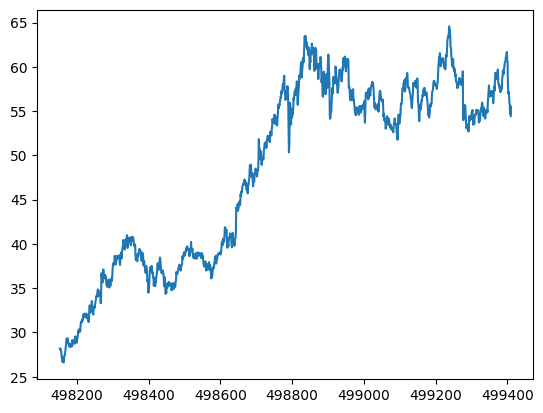

In [6]:
sbux['close'].plot()

In [7]:
sbux['prev_close'] = sbux['close'].shift(1)

In [8]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [9]:
sbux['return'] = sbux['close'] / sbux['prev_close'] - 1

In [10]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [11]:
sbux['return2'] = sbux['close'].pct_change(1)

In [12]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015


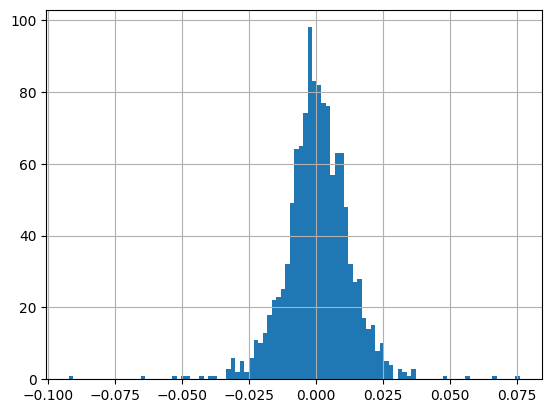

In [13]:
sbux['return'].hist(bins=100);

In [14]:
sbux['return'].mean(), sbux['return'].std()

(0.0006002332205830914, 0.012360934026133879)

In [15]:
sbux['log_return'] = np.log(sbux['return'] + 1)

In [16]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2,log_return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080,-0.004089
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138,0.002135
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643,-0.007672
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015,-0.005028


In [17]:
from scipy.stats import norm

In [18]:
x_list = np.linspace(sbux['return'].min(),
                      sbux['return'].max(),
                      100)

In [19]:
y_list = norm.pdf(x_list,loc=sbux['return'].mean(), scale=sbux['return'].std())

<Axes: >

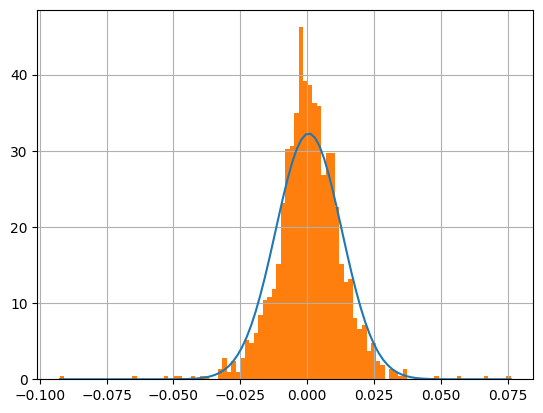

In [20]:
plt.plot(x_list, y_list);
sbux['return'].hist(bins=100, density=True)

In [21]:
from scipy.stats import probplot

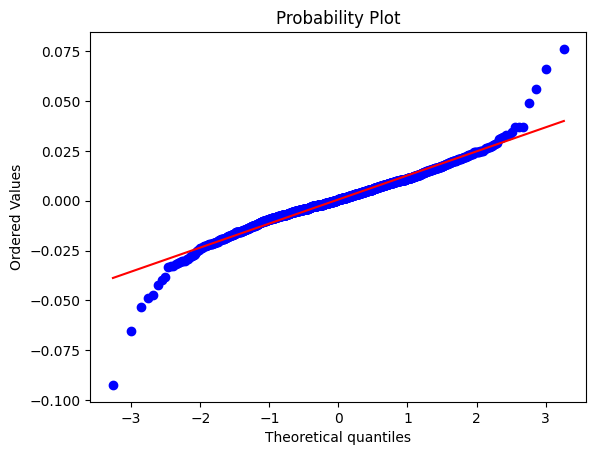

In [22]:
probplot(sbux['return'].dropna(), dist='norm', fit=True, plot=plt);

### t-distribution

In [23]:
from scipy.stats import t

In [24]:
import statsmodels.api as sm

In [25]:
x_list = np.linspace(
    sbux['return'].min(),
    sbux['return'].max(),
    100)


In [26]:
params = t.fit(sbux['return'].dropna())

In [27]:
params

(4.78753221828017, 0.0007108616716254146, 0.009341981642040986)

In [28]:
df,loc, scale = params

In [29]:
y_list = t.pdf(x_list, df, loc, scale)

<Axes: >

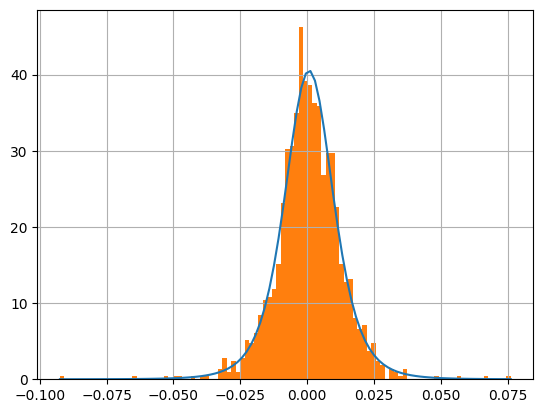

In [30]:
plt.plot(x_list, y_list);
sbux['return'].hist(bins=100,density=True)

Look at this graph vs the noraml distribution above.  This t-distribtuion fits the graph better than the normal.

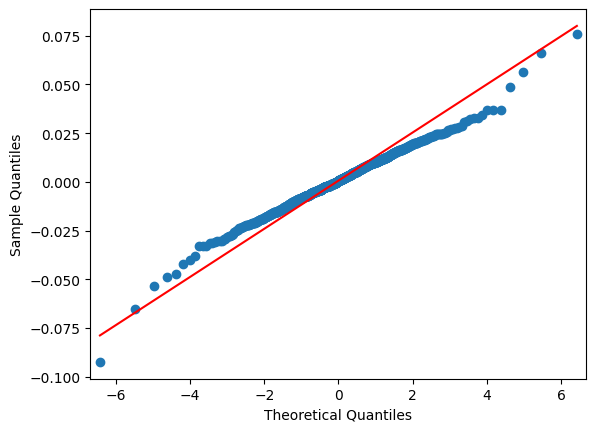

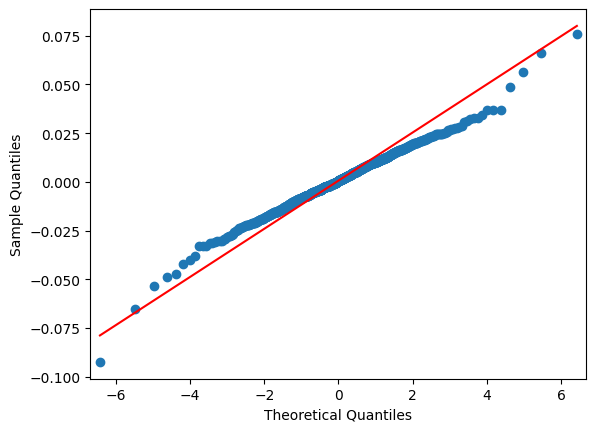

In [31]:
class myt:
  def __init__(self, df) :
   self.df = df

  def fit(self, x):
    return t.fit(x)

  def ppf(self, x, loc=0, scale=1):
    return t.ppf(x, self.df, loc, scale)

sm.qqplot(sbux['return'].dropna(), dist=myt(df), line='s')


In [32]:
x_list = np.linspace(
    sbux['log_return'].min(),
    sbux['log_return'].max(),
    100
)

In [33]:
params = t.fit(sbux['log_return'].dropna())

In [34]:
df, loc, scale = params

In [35]:
y_list = t.pdf(x_list, df, loc, scale)

<Axes: >

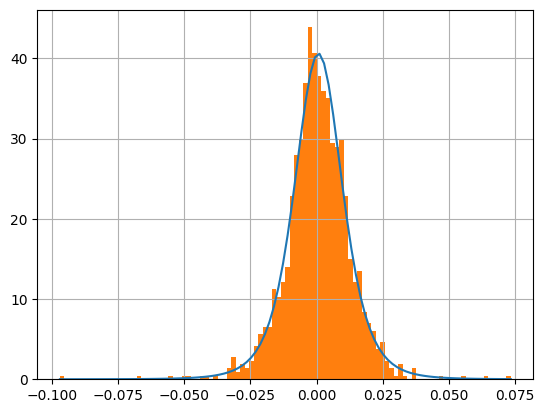

In [36]:
plt.plot(x_list, y_list);
sbux['log_return'].hist(bins=100, density=True)

Skewness and Curtosis

In [37]:
sbux['return'].skew()

-0.2680784195824153

In [38]:
sbux['return'].kurtosis()

5.593158903424731

In [39]:
sbux['log_return'].skew()

-0.41015501490182066

In [40]:
sbux['log_return'].kurtosis()

5.964502225799283

the skews are negative.  therefore starbucks returns are slightly left tailed. In both cases kurtosis is > 0 suggests that they are more heavy tailed than normal distro and should get heavy values in general.

In [41]:
samp = pd.Series(np.random.randn(10000))
samp.skew(), samp.kurtosis()

(0.026581936032837462, 0.038656631099991845)

### Confidence Intervals

In [42]:
values = sbux['return'].dropna().to_numpy()

In [43]:
values

array([-0.00408018,  0.00213751, -0.00764309, ..., -0.01936525,
        0.01682209, -0.02067973])

In [44]:
m = values.mean()
s = values.std(ddof=1)

In [45]:
low = m - 1.96 * s / np.sqrt(len(values))
high = m + 1.96 * s / np.sqrt(len(values))

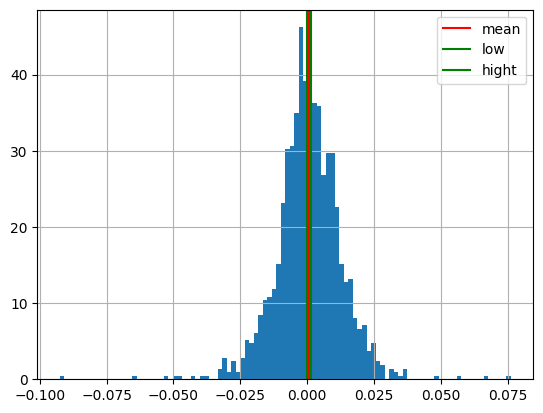

In [46]:
sbux['return'].hist(bins=100, density=True);
plt.axvline(m, label='mean', color='red');
plt.axvline(low, label='low', color='green');
plt.axvline(high, label='hight', color = 'green');
plt.legend();


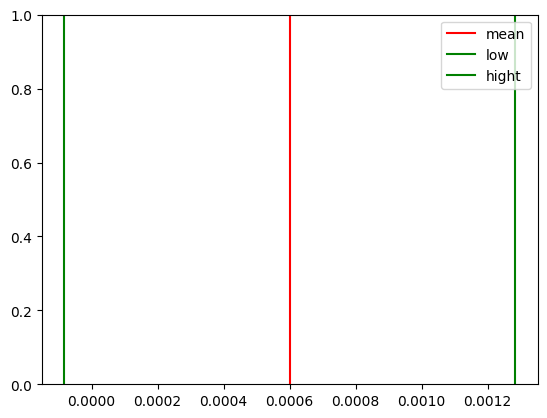

In [47]:
plt.axvline(m, label='mean', color='red');
plt.axvline(low, label='low', color='green');
plt.axvline(high, label='hight', color = 'green');
plt.legend();

In [48]:
from scipy.stats import jarque_bera, normaltest

In [49]:
jarque_bera(values)

SignificanceResult(statistic=1639.028438655224, pvalue=0.0)

In [50]:
normaltest(values)

NormaltestResult(statistic=172.6819672061636, pvalue=3.1811727900119636e-38)

In [51]:
jarque_bera(sbux['log_return'].dropna())

SignificanceResult(statistic=1882.1814629047703, pvalue=0.0)

In [52]:
normaltest(sbux['log_return'].dropna())

NormaltestResult(statistic=198.54738937007733, pvalue=7.690989175882069e-44)

In [53]:
from scipy.stats import kstest

In [54]:
df, loc, scale = t.fit(values)
def cdf(x):
  return t.cdf(x, df, loc, scale)

kstest(values, cdf)

KstestResult(statistic=0.01887566203844726, pvalue=0.7537785475444063, statistic_location=-0.0003257859586252021, statistic_sign=1)

In [55]:
df, loc, scale = t.fit(sbux['log_return'].dropna())
def cdf(x):
  return t.cdf(x, df, loc, scale)

kstest(sbux['log_return'].dropna(), cdf)

KstestResult(statistic=0.01837990941957013, pvalue=0.7818301159274575, statistic_location=-0.0003258390383993639, statistic_sign=1)

In [56]:
from scipy.stats import ttest_1samp

In [57]:
ttest_1samp(values, 0)

TtestResult(statistic=1.7223010261810556, pvalue=0.08526098717694539, df=1257)

In [58]:
ttest_1samp(sbux['log_return'].dropna(), 0)

TtestResult(statistic=1.4999195047533647, pvalue=0.13388636615667793, df=1257)

In [59]:
mmm = data[data['Name'] == 'MMM'].copy()

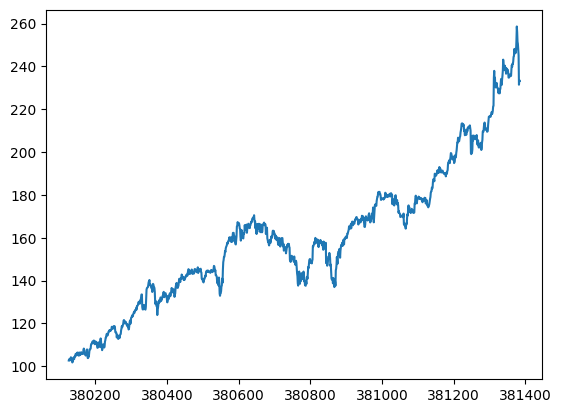

In [60]:
mmm['close'].plot();

In [61]:
mmm['prev_close'] = mmm['close'].shift(1)

In [62]:
mmm['return'] = mmm['close'] / mmm['prev_close'] -1

In [63]:
mmm['log_return'] = np.log(mmm['return'] + 1)

In [64]:
mmm['return'].mean(), mmm['return'].std()

(0.0007001182500580143, 0.009768718404053094)

<Axes: >

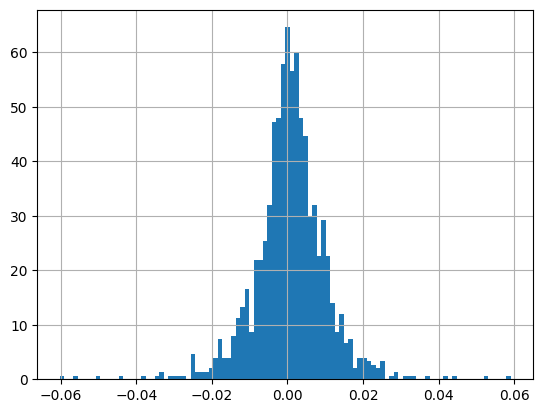

In [65]:
mmm['return'].hist(bins=100, density=True)

### Covariance and Correlation

In [66]:
!wget -nc https://lazyprogrammer.me/course_files/sp500_close.csv

--2024-02-13 00:29:41--  https://lazyprogrammer.me/course_files/sp500_close.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4143332 (4.0M) [text/csv]
Saving to: ‘sp500_close.csv’

sp500_close.csv     100%[===================>]   3.95M  12.0MB/s    in 0.3s    

2024-02-13 00:29:42 (12.0 MB/s) - ‘sp500_close.csv’ saved [4143332/4143332]



In [67]:
close = pd.read_csv('sp500_close.csv')

In [68]:
symbols = ['AAPL', 'GOOG', 'IBM', 'NFLX', 'SBUX']
sub = close[symbols].copy()

In [69]:
sub.dropna(axis=0,how='all', inplace=True)

In [70]:
sub.head()

,AAPL,GOOG,IBM,NFLX,SBUX
0,67.8542,NaN,201.68,25.8528,28.185
3,68.5614,NaN,200.16,25.4128,28.070
4,66.8428,NaN,200.04,25.4214,28.130
5,66.7156,NaN,200.09,26.6098,27.915
6,66.6556,NaN,199.65,26.7714,27.775


In [71]:
for symbol in symbols:
  sub[symbol + '_prev'] = sub[symbol].shift(1)
  sub[symbol + '_ret'] = sub[symbol] / sub[symbol + '_prev'] - 1

In [72]:
rets = sub[[symbol + '_ret' for symbol in symbols]].copy()

In [73]:
rets.head()

,AAPL_ret,GOOG_ret,IBM_ret,NFLX_ret,SBUX_ret
0,NaN,NaN,NaN,NaN,NaN
3,0.010422,NaN,-0.007537,-0.017019,-0.004080
4,-0.025067,NaN,-0.000600,0.000338,0.002138
5,-0.001903,NaN,0.000250,0.046748,-0.007643
6,-0.000899,NaN,-0.002199,0.006073,-0.005015


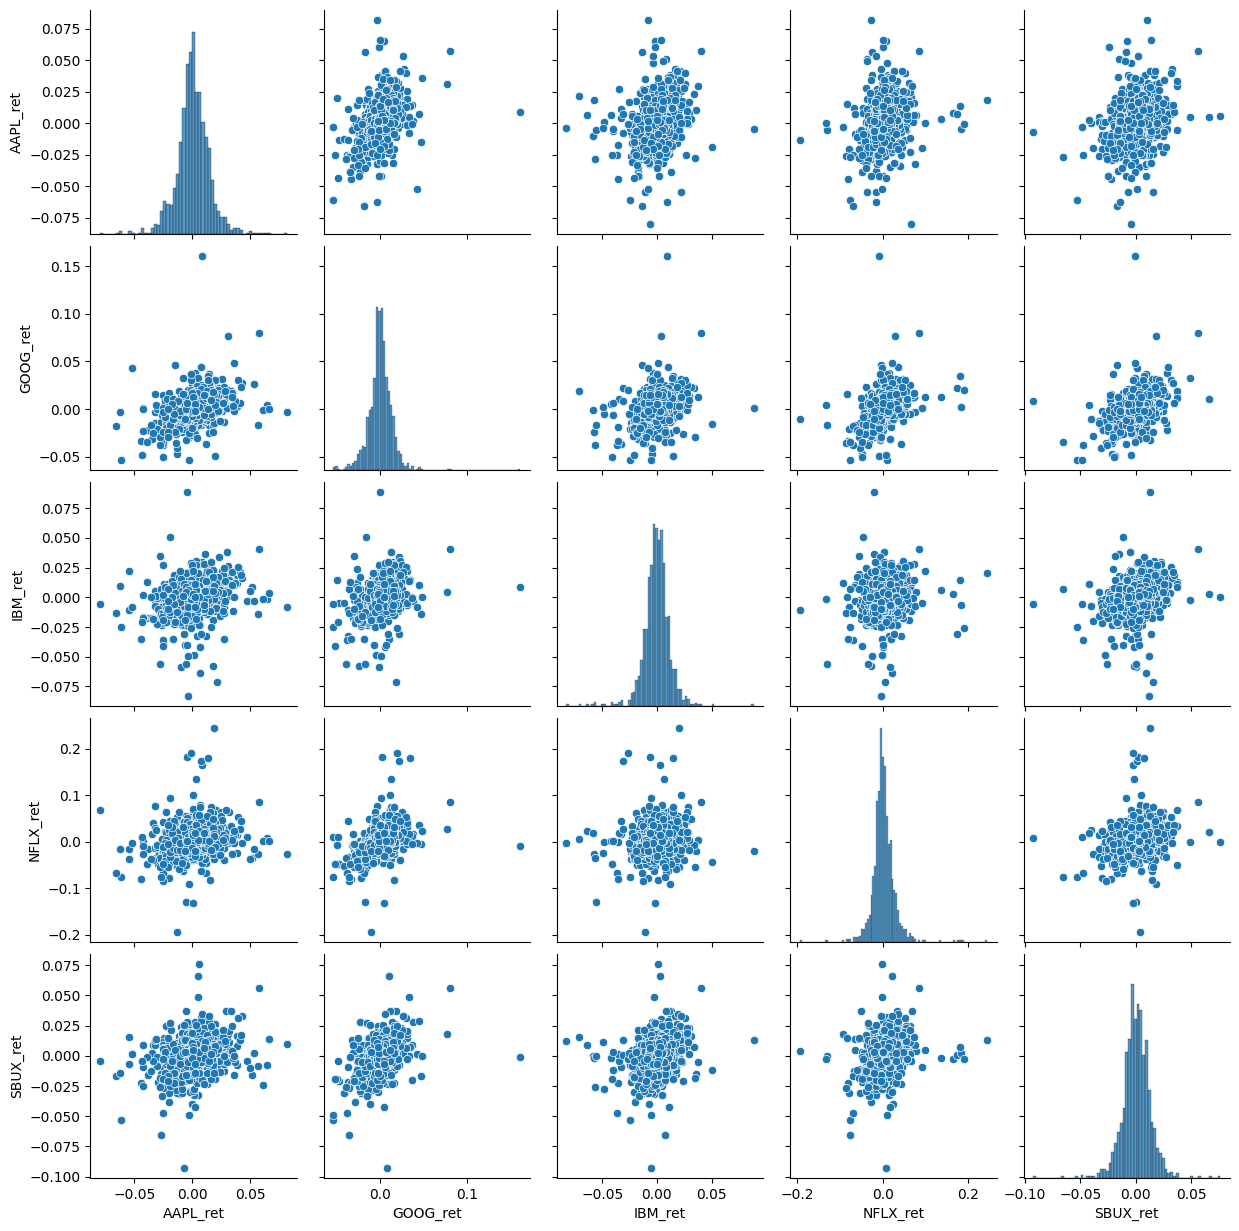

In [74]:
import seaborn as sns
sns.pairplot(rets);

In [75]:
rets.corr()

,AAPL_ret,GOOG_ret,IBM_ret,NFLX_ret,SBUX_ret
AAPL_ret,1.000000,0.415487,0.263927,0.227387,0.307716
GOOG_ret,0.415487,1.000000,0.345643,0.404768,0.455936
IBM_ret,0.263927,0.345643,1.000000,0.163267,0.315263
NFLX_ret,0.227387,0.404768,0.163267,1.000000,0.266012
SBUX_ret,0.307716,0.455936,0.315263,0.266012,1.000000


In [76]:
rets.cov()

,AAPL_ret,GOOG_ret,IBM_ret,NFLX_ret,SBUX_ret
AAPL_ret,0.000213,0.000084,0.000046,0.000091,0.000056
GOOG_ret,0.000084,0.000198,0.000058,0.000151,0.000079
IBM_ret,0.000046,0.000058,0.000141,0.000053,0.000046
NFLX_ret,0.000091,0.000151,0.000053,0.000748,0.000090
SBUX_ret,0.000056,0.000079,0.000046,0.000090,0.000153


### Mixutre of Gaussians

In [77]:
x_list = np.linspace(-0.1, 0.1, 500)

In [79]:
p =0.5
fx = p * norm.pdf(x_list, loc=0, scale=0.01) + \
(1-p) * norm.pdf(x_list, loc=0, scale=0.002)

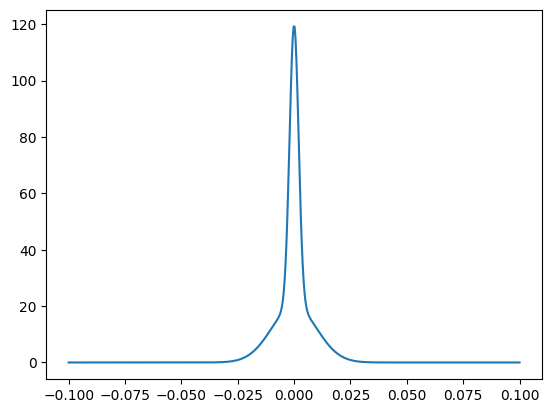

In [80]:
plt.plot(x_list, fx);

In [82]:
samples = []
m0, s0 = 0, 0.01
m1, s1 = 0, 0.002
for _ in range(5000):
  if np.random.random() < p:
    x = norm.rvs(m0, s0)
  else:
    x = norm.rvs(m1,s1)
  samples.append(x)

series = pd.Series(samples)
series.kurtosis()

2.3859290739574854

In [83]:
from sklearn.mixture import GaussianMixture

In [86]:
data = sbux['log_return'].dropna().to_numpy().reshape(-1,1)
model = GaussianMixture(n_components=2)
model.fit(data)

weights = model.weights_
means = model.means_
cov = model.covariances_
print("weights: ", weights)
print("means: ", means)
print("variances: ", cov)

weights:  [0.38600428 0.61399572]
means:  [[-0.00047901]
 [ 0.0011539 ]]
variances:  [[[2.94718060e-04]]

 [[6.47866453e-05]]]


In [92]:
means.shape

(2,)

In [87]:
means = means.flatten()
var = cov.flatten()

In [93]:
means.shape

(2,)

In [91]:
means

array([-0.00047901,  0.0011539 ])

In [88]:
x_list = np.linspace(data.min(), data.max(), 100)
fx0 = norm.pdf(x_list, means[0], np.sqrt(var[0]))
fx1 = norm.pdf(x_list, means[1], np.sqrt(var[1]))
fx = weights[0] * fx0 + weights[1] * fx1

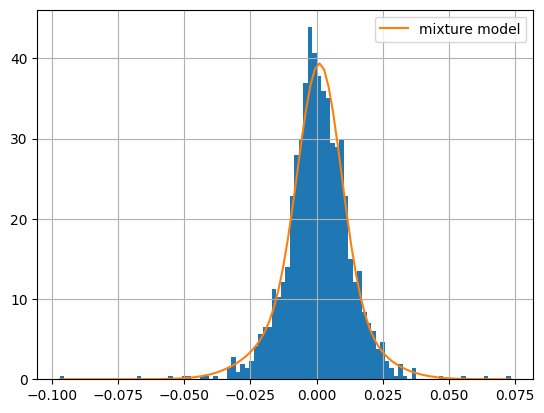

In [89]:
sbux['log_return'].hist(bins=100, density=True)
plt.plot(x_list, fx, label='mixture model')
plt.legend();

In [90]:
means[0]

-0.000479008687062255